# Tree figures

* This script uses the differential abundance outputs and the phylogenetic tree to generate output files for import into the tree of life
* 


In [1]:
out_Dir = '~/Hyphosphere/data/3Exp/figures'

work_dir = '~/Hyphosphere/data/3Exp/DESeq'

# phyloseq - full object with tree
physeq_file = '~/Hyphosphere/data/3Exp/phyloseq/3Exp_phyloseq_thresh_wtree_experimental_woContam.rds'

In [2]:
library(RColorBrewer)
library(plyr)
library(tidyr)
library(dplyr)
library(reshape2)
library(phyloseq)
library(ggplot2)
library(ggtree)
library(gridExtra)

Warning message:
“package ‘RColorBrewer’ was built under R version 3.6.1”Warning message:
“package ‘plyr’ was built under R version 3.6.1”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘reshape2’ was built under R version 3.6.1”
Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Warning message:
“package ‘phyloseq’ was built under R version 3.6.1”Warning message:
“package ‘ggplot2’ was built under R version 3.6.1”Warning message:
“package ‘ggtree’ was built under R version 3.6.1”Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 
ggtree v2.0.0  For help: https://yulab-smu.github.io/treedata-book/

If yo

In [3]:
g_legend <- function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)
}



# Identify top taxa
* melting data frame and summarizing by experiment, soil and treatment avoids increased weight to taxa in samples with higher replications

In [364]:
ps = readRDS(physeq_file) %>% subset_taxa(., !is.na(Phylum)) %>%
    # remove non-experimental controls
    
    subset_samples(., SampleType != "GV" & Experiment %in% c(1,2) & Fungus == "Gv" & SampleType %in% c("CS","CH") & Soil != "Sand") %>%

     # re-normalize after subsetting taxa
    transform_sample_counts(., function(x) x/sum(x))

ps


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
A

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 18707 taxa and 58 samples ]
sample_data() Sample Data:       [ 58 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 18707 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 18707 tips and 18706 internal nodes ]

In [365]:
ps.m = ps %>%
    psmelt() %>%
    group_by(OTU, Soil, Experiment) %>%
    summarise(mAbund = mean(Abundance)) %>%
    ungroup() %>% 
    group_by(OTU) %>%
    summarise(smAbund = sum(mAbund)) 
head(ps.m)

Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’


OTU,smAbund
ASV100,8.172735e-03
ASV1000,1.517569e-03
ASV10000,0.000000e+00
ASV10001,2.481481e-05
ASV10002,1.075044e-04
ASV10003,6.691852e-05


### Top 60 most abundant taxa

In [366]:
topTax = ps.m %>% 
    arrange(desc(smAbund)) %>%
    .[1:60,] %>%
    .$OTU %>%
    as.character()

topTax
            

[1] "ASV5"    "ASV6"    "ASV57"   "ASV14"   "ASV18"   "ASV61"   "ASV16"  
 [8] "ASV103"  "ASV39"   "ASV33"   "ASV148"  "ASV25"   "ASV943"  "ASV21"  
[15] "ASV47"   "ASV118"  "ASV143"  "ASV915"  "ASV23"   "ASV718"  "ASV24"  
[22] "ASV17"   "ASV71"   "ASV46"   "ASV29"   "ASV40"   "ASV44"   "ASV69"  
[29] "ASV64"   "ASV55"   "ASV648"  "ASV77"   "ASV338"  "ASV247"  "ASV1132"
[36] "ASV98"   "ASV168"  "ASV50"   "ASV66"   "ASV37"   "ASV383"  "ASV36"  
[43] "ASV104"  "ASV288"  "ASV60"   "ASV65"   "ASV1847" "ASV259"  "ASV246" 
[50] "ASV81"   "ASV286"  "ASV961"  "ASV30"   "ASV661"  "ASV91"   "ASV138" 
[57] "ASV514"  "ASV1925" "ASV126"  "ASV230"

In [367]:
rm(ps.m)

### subset tree and save names of taxa in tree

In [368]:
# Filter to the top OTUs identified above

physeq.thresh <- prune_taxa(topTax, ps)

physeq.thresh

# Save tree
MyTree =  physeq.thresh %>% phy_tree

# Save names of taxa in tree
TreeTax = taxa_names(physeq.thresh)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 60 taxa and 58 samples ]
sample_data() Sample Data:       [ 58 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 60 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 60 tips and 59 internal nodes ]

###  taxonomy table for taxa in tree

In [369]:
df.tax = physeq.thresh %>% tax_table %>% as.data.frame
df.tax$OTU = df.tax %>% row.names

df.tax = mutate(df.tax, TaxLabel = paste(Family, Genus, sep = "_")) %>%
    select(OTU, TaxLabel, Phylum, Class, Order, Family, Genus)


df.tax = df.tax %>%
    mutate(GenusLabel = ifelse(!is.na(Genus), paste(Genus), 
                        ifelse(!is.na(Family), paste('Uncl. ', Family, sep = ""), 
                        ifelse(!is.na(Order), paste('Uncl. ', Order, sep = ""),
                        ifelse(!is.na(Class), paste('Uncl. ', Class, sep = ""), paste("Uncl. ", Phylum, sep = "")))))) %>%
    mutate(GenusLabel = ifelse(GenusLabel == 'Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium', 'Allo-Neo-Para-Rhizobium', GenusLabel))
head(df.tax)

OTU,TaxLabel,Phylum,Class,Order,Family,Genus,GenusLabel
ASV37,Chthoniobacteraceae_Candidatus_Udaeobacter,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,Candidatus_Udaeobacter,Candidatus_Udaeobacter
ASV55,Chthoniobacteraceae_Candidatus_Udaeobacter,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,Candidatus_Udaeobacter,Candidatus_Udaeobacter
ASV230,Chthoniobacteraceae_Candidatus_Udaeobacter,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,Candidatus_Udaeobacter,Candidatus_Udaeobacter
ASV98,NA_NA,Acidobacteria,Subgroup_6,NA,NA,NA,Uncl. Subgroup_6
ASV65,NA_NA,Rokubacteria,NC10,Rokubacteriales,NA,NA,Uncl. Rokubacteriales
ASV104,NA_NA,Rokubacteria,NC10,Rokubacteriales,NA,NA,Uncl. Rokubacteriales


In [10]:
### log2fold change data

In [370]:
readfile = file.path(work_dir, 'dfl2fc-Exp1.txt')
df.l2fc.Exp1 = read.table(readfile, header = TRUE, sep= '\t')

readfile = file.path(work_dir, 'dfl2fc-Exp2.txt')
df.l2fc.Exp2 = read.table(readfile, header = TRUE, sep= '\t')

df.l2fc = bind_rows(df.l2fc.Exp1, df.l2fc.Exp2) %>% filter(OTU %in% TreeTax)


df.l2fc = df.l2fc %>% separate(Subset, c("Soil","Fungus")) 

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

In [371]:
df.l2fc$Phylum = factor(df.l2fc$Phylum)
df.l2fc$Order = factor(df.l2fc$Order)
df.l2fc$Class = factor(df.l2fc$Class)

#Link phylum colors 
FigPhyla = df.l2fc$Phylum %>% levels() %>% as.character()
FigClass = df.l2fc$Class %>% levels() %>% as.character()
FigOrder = df.l2fc$Order %>% levels() %>% as.character()


ColorCount = length(FigOrder)
getPalette = colorRampPalette(brewer.pal(8, "Dark2"))
Ocs = getPalette(ColorCount)
Ocs


ColorCount = length(FigPhyla)
getPalette = colorRampPalette(brewer.pal(8, "Dark2"))
Pcs = getPalette(ColorCount)
Pcs

ColorCount = length(FigClass)
getPalette = colorRampPalette(brewer.pal(8, "Dark2"))
Ccs = getPalette(ColorCount)
Ccs


# Pcs = brewer.pal(12,"Set3")

#Set lookup to 
Olookup = cbind(FigOrder, Ocs) %>% as.data.frame()
Plookup = cbind(FigPhyla, Pcs) %>% as.data.frame()
Clookup = cbind(FigClass, Ccs) %>% as.data.frame()

df.l2fc = left_join(df.l2fc, Plookup, by = c("Phylum" = "FigPhyla"))
df.l2fc = left_join(df.l2fc, Olookup, by = c("Order" = "FigOrder")) 
df.l2fc = left_join(df.l2fc, Clookup, by = c("Class" = "FigClass")) 



df.l2fc %>% head()

[1] "#1B9E77" "#5D874E" "#A07125" "#D35F0A" "#B16548" "#8D6B86" "#8068AE"
 [8] "#A850A0" "#D03792" "#D33B79" "#A66753" "#79932E" "#7FA718" "#ACA80E"
[15] "#D9AA04" "#D59D08" "#BF8B12" "#A9781B" "#927132" "#7C6B4C" "#666666"

[1] "#1B9E77" "#93752C" "#BD6332" "#7E6EA2" "#B3499C" "#CF3F76" "#7D8F31"
 [8] "#A0A811" "#E0A604" "#B78415" "#8E7037" "#666666"

[1] "#1B9E77" "#738040" "#CC6309" "#B16548" "#826D9B" "#9B58A5" "#D03792"
 [8] "#C44A6D" "#88843A" "#7FA718" "#BBA90B" "#DDA305" "#BF8B12" "#A17421"
[15] "#836D43" "#666666"

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,OTU,Soil,Fungus,Term,⋯,Kingdom,Phylum,Class,Order,Family,Genus,Experiment,Pcs,Ocs,Ccs
331.72029,-2.7165660,0.5217389,-5.2067536,1.921730e-07,1.885675e-05,ASV5,Lansing,Gv,SampleType,⋯,Bacteria,Actinobacteria,Actinobacteria,Micrococcales,Micrococcaceae,Pseudarthrobacter,1,#93752C,#79932E,#1B9E77
136.95264,4.9776118,1.1905977,4.1807671,2.905274e-05,1.192425e-03,ASV6,Lansing,Gv,SampleType,⋯,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Cellvibrionaceae,Cellvibrio,1,#B78415,#D35F0A,#C44A6D
26.70389,8.4299996,1.7857267,4.7207669,2.349571e-06,1.478663e-04,ASV14,Lansing,Gv,SampleType,⋯,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Sandaracinaceae,NA,1,#B78415,#7FA718,#9B58A5
83.95545,-0.6640584,0.8698881,-0.7633838,4.452345e-01,6.618920e-01,ASV16,Lansing,Gv,SampleType,⋯,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Xanthobacteraceae,Bradyrhizobium,1,#B78415,#BF8B12,#738040
0.00000,NA,NA,NA,NA,NA,ASV17,Lansing,Gv,SampleType,⋯,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Paucibacter,1,#B78415,#A07125,#C44A6D
159.58144,11.0823839,1.3629242,8.1313284,4.246114e-16,2.004166e-13,ASV18,Lansing,Gv,SampleType,⋯,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Sandaracinaceae,NA,1,#B78415,#7FA718,#9B58A5


# Generate figures

### Format data

In [87]:

# Get relative abundance data
mdf = readRDS(physeq_file) %>% subset_taxa(., !is.na(Phylum)) %>%
  subset_samples(., SampleType != "GV" & Experiment %in% c(1,2) & Fungus == "Gv" & 
                 SampleType %in% c("CS","CH") & Soil != "Sand") %>%
    transform_sample_counts(., function(x) x/sum(x)) %>%
    prune_taxa(topTax, .) %>% 
    psmelt()

mdf.byOTU = ddply(mdf, .(Soil, OTU, Experiment), summarize, mean_Abundance = mean(Abundance)) 

# filter and format log2fold change data
tmp = df.l2fc %>% filter(Contrast == "CH_CS" & Fungus == "Gv") %>%
    left_join(., mdf.byOTU) %>%
    select(OTU, Soil, Experiment, padj, mean_Abundance, log2FoldChange, Phylum, Order, Class, Family, Genus, Pcs, Ccs, Ocs) %>%
    filter(OTU %in% TreeTax)


df.l2fc.L = filter(tmp, Soil == "Lansing" & OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
head(df.l2fc.L)

#     #create dataframe of non-significant points
#    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.L.sig.1 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.L.ns.1 = df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.L.sig.2 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.L.ns.2= df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.F = filter(tmp, Soil == "Florence" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance ,log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.F.sig.1 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.F.ns.1 = df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.F.sig.2 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.F.ns.2= df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.P = filter(tmp, Soil == "Pendelton" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.P.sig.1 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.P.ns.1 = df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.P.sig.2 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.P.ns.2= df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 2)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
A

OTU,mean_Abundance,log2FoldChange,sig,Phylum,Order,Class,Genus,Experiment,Pcs,Ocs,Ccs
ASV5,0.020395195,-2.7165660,sig,Actinobacteria,Micrococcales,Actinobacteria,Pseudarthrobacter,1,#93752C,#79932E,#1B9E77
ASV6,0.009201270,4.9776118,sig,Proteobacteria,Cellvibrionales,Gammaproteobacteria,Cellvibrio,1,#B78415,#D35F0A,#C44A6D
ASV14,0.001813107,8.4299996,sig,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,1,#B78415,#7FA718,#9B58A5
ASV16,0.005376328,-0.6640584,ns,Proteobacteria,Rhizobiales,Alphaproteobacteria,Bradyrhizobium,1,#B78415,#BF8B12,#738040
ASV17,0.000000000,NA,ns,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Paucibacter,1,#B78415,#A07125,#C44A6D
ASV18,0.010919483,11.0823839,sig,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,1,#B78415,#7FA718,#9B58A5


### Build CH-CS tree

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Duplicated aesthetics after name standardisation: shape”Warning message:
“Removed 16 rows containing missing values (geom_point).”Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 16 rows containing missing values (geom_point).”Warning message:
“Removed 19 rows containing missing values (geom_point).”Warning message:
“Removed 14 rows containing missing values (geom_point).”Warning message:
“Removed 11 rows containing missing values (geom_point).”

png 
  2

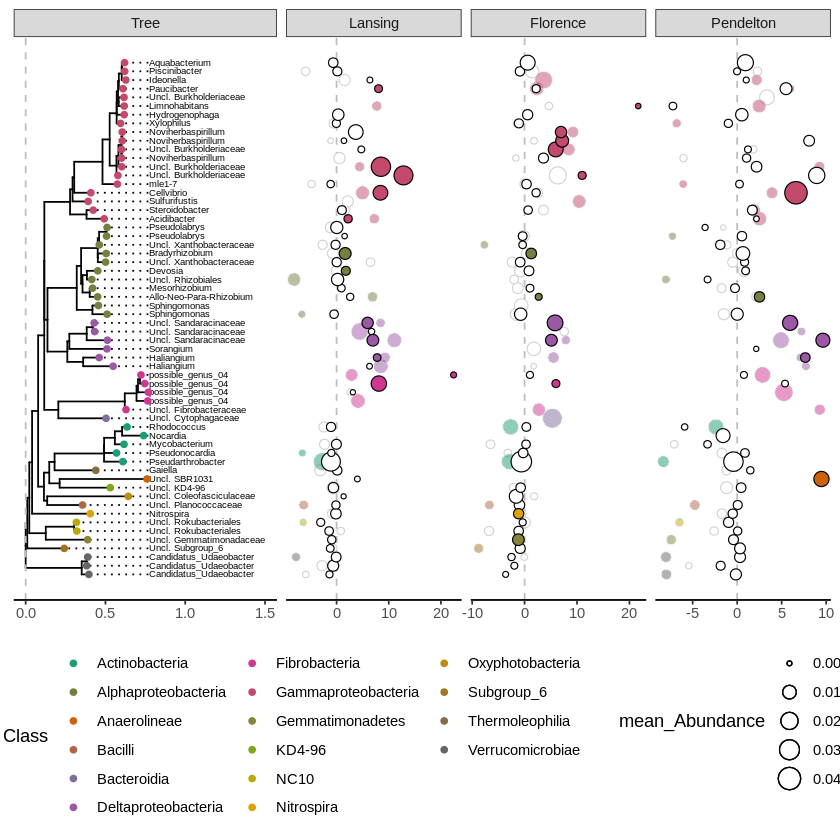

In [88]:

p  = ggtree(MyTree) %<+% df.tax
#p = p + aes(color=Phylum) 

p = p +
    geom_tiplab(aes(label = GenusLabel), align = TRUE, size = 2) +
    geom_tippoint(aes(color=Class), size=1.5)+
    scale_color_manual(values = Ccs, guide = guide_legend(ncol = 3))+

geom_vline(xintercept = 0, lty = 2, color = "Grey") +
geom_facet(panel = "Lansing", data = df.l2fc.L.ns.1, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +
                
geom_facet(panel = "Lansing", data = df.l2fc.L.sig.1, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), color = "LightGrey", shape = 21, alpha = 0.5) +
                scale_fill_identity() +
geom_facet(panel = "Lansing", data = df.l2fc.L.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
geom_facet(panel = "Lansing", data = df.l2fc.L.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21)  +



geom_facet(panel = "Florence", data = df.l2fc.F.ns.1, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +                
geom_facet(panel = "Florence", data = df.l2fc.F.sig.1, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21,  color = "LightGrey") + 

geom_facet(panel = "Florence", data = df.l2fc.F.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
geom_facet(panel = "Florence", data = df.l2fc.F.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21) + 


geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.1, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, shape = 21, fill = "white", color = "LightGrey") +
geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.1, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21, color = "LightGrey") + 

geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21,  fill = "white", color = "Black") +                
geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs),  shape = 21) + 
    
           #ggplot2::scale_shape_manual(values = c(1,21))+
            theme_tree2(legend.position = 'bottom')+
            scale_size_continuous(guide = guide_legend(ncol = 1))+


#
#xlim(c(-10, 15))+ #, 'Lansing')+
#xlim_expand(c(-10, 15), 'Florence')+
#xlim_expand(c(-10, 15), 'Pendelton')
xlim_tree(1.5)
         

p = facet_widths(p, widths = c(Tree = 1.5)) #, Lansing = 1, Florence = 1, Pendelton = 1))

p
#mylegend <- g_legend(p)


#p = p + theme(legend.position = "none")

# current files created with top 75 taxa
# mylegend
pdf(file = file.path(out_Dir,"CH_CS_l2fc_tree_class.pdf"), width = 7.086, height = 6.5, useDingbats = FALSE)
p
dev.off()

# pdf(file = file.path(out_Dir,"CH_CS_l2fc_tree_order_legend.pdf"), width = 9, height = 4, useDingbats = FALSE)
# grid.draw(mylegend)
# dev.off()

# CH - BP contrast

## formate data 

In [89]:
df.l2fc.L.sig.2 %>% filter(OTU == "ASV14")

OTU,mean_Abundance,log2FoldChange,sig,Phylum,Order,Class,Genus,Experiment,Pcs,Ocs,Ccs
ASV14,0.005765607,5.948495,sig,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,2,#B78415,#7FA718,#9B58A5


In [90]:
# Get relative abundance data
mdf = readRDS(physeq_file) %>% subset_taxa(., !is.na(Phylum)) %>%
  subset_samples(., SampleType != "GV" & Experiment %in% c(1,2) & Fungus == "Gv" & 
                 SampleType %in% c("BP","CH") & Soil != "Sand") %>%
    transform_sample_counts(., function(x) x/sum(x)) %>%
    prune_taxa(topTax, .) %>% 
    psmelt()

mdf.byOTU = ddply(mdf, .(Soil, OTU, Experiment), summarize, mean_Abundance = mean(Abundance)) 

# filter and format log2fold change data
tmp = df.l2fc %>% filter(Contrast == "CH_BP" & Fungus == "Gv") %>%
    left_join(., mdf.byOTU) %>%
    select(OTU, Soil, Experiment, padj, mean_Abundance, log2FoldChange, Phylum, Order, Class, Family, Genus, Pcs, Ccs, Ocs) %>%
    filter(OTU %in% TreeTax)


df.l2fc.L = filter(tmp, Soil == "Lansing" & OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
head(df.l2fc.L)

#     #create dataframe of non-significant points
#    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.L.sig.1 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.L.ns.1 = df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.L.sig.2 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.L.ns.2= df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.F = filter(tmp, Soil == "Florence" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance ,log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.F.sig.1 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.F.ns.1 = df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.F.sig.2 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.F.ns.2= df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.P = filter(tmp, Soil == "Pendelton" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.P.sig.1 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.P.ns.1 = df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.P.sig.2 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.P.ns.2= df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 2)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
A

OTU,mean_Abundance,log2FoldChange,sig,Phylum,Order,Class,Genus,Experiment,Pcs,Ocs,Ccs
ASV5,0.010413997,1.0865779,ns,Actinobacteria,Micrococcales,Actinobacteria,Pseudarthrobacter,2,#93752C,#79932E,#1B9E77
ASV6,0.013073422,7.8825238,sig,Proteobacteria,Cellvibrionales,Gammaproteobacteria,Cellvibrio,2,#B78415,#D35F0A,#C44A6D
ASV14,0.005618105,7.7989806,sig,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,2,#B78415,#7FA718,#9B58A5
ASV16,0.010181105,0.2202283,ns,Proteobacteria,Rhizobiales,Alphaproteobacteria,Bradyrhizobium,2,#B78415,#BF8B12,#738040
ASV17,0.001320807,7.9040448,sig,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Paucibacter,2,#B78415,#A07125,#C44A6D
ASV18,0.006423097,8.8594744,sig,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,2,#B78415,#7FA718,#9B58A5


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Removed 9 rows containing missing values (geom_point).”Warning message:
“Removed 17 rows containing missing values (geom_point).”Warning message:
“Removed 11 rows containing missing values (geom_point).”

png 
  2

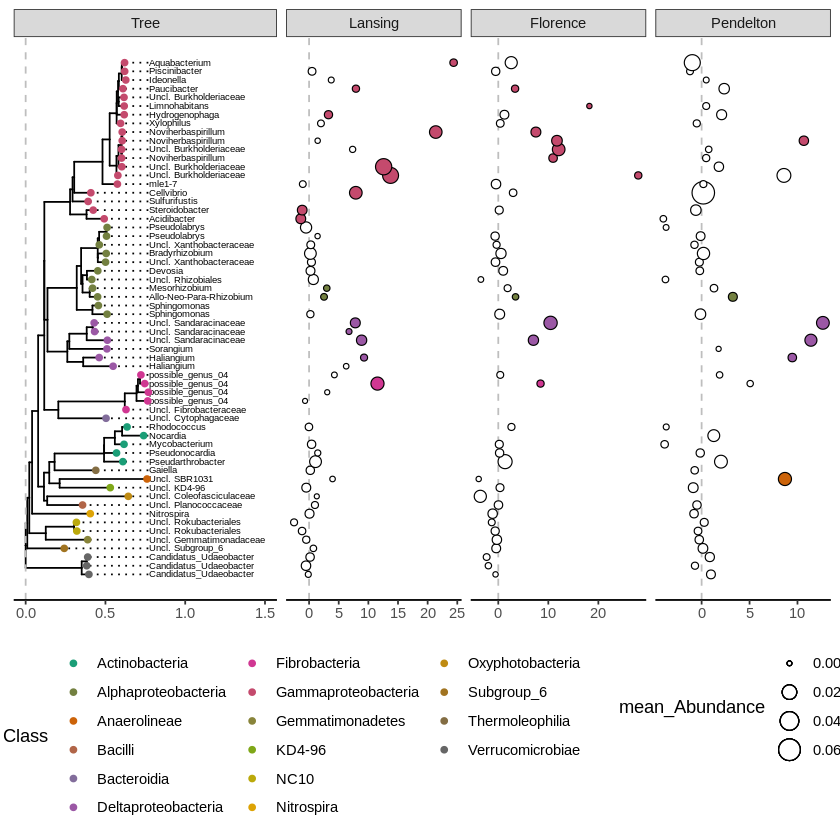

In [91]:
p  = ggtree(MyTree) %<+% df.tax
#p = p + aes(color=Phylum) 

p = p +
     geom_tiplab(aes(label = GenusLabel), align = TRUE, size = 2) +

    geom_tippoint(aes(color=Class), size=1.5)+
    scale_color_manual(values = Ccs, guide = guide_legend(ncol = 3))+

geom_vline(xintercept = 0, lty = 2, color = "Grey") +
# geom_facet(panel = "Lansing", data = df.l2fc.L.ns.1, geom= geom_point,
#                aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +
                
# geom_facet(panel = "Lansing", data = df.l2fc.L.sig.1, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), color = "LightGrey", shape = 21, alpha = 0.5) +
#                 scale_fill_identity() +
geom_facet(panel = "Lansing", data = df.l2fc.L.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
geom_facet(panel = "Lansing", data = df.l2fc.L.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21) +



# geom_facet(panel = "Florence", data = df.l2fc.F.ns.1, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +                
# geom_facet(panel = "Florence", data = df.l2fc.F.sig.1, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21,  color = "LightGrey") + 

geom_facet(panel = "Florence", data = df.l2fc.F.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
geom_facet(panel = "Florence", data = df.l2fc.F.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21) + 


# # geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.1, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, shape = 21, fill = "white", color = "LightGrey") +
# # geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.1, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21, color = "LightGrey") + 

geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21,  fill = "white", color = "Black") +                
geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs),   shape = 21) + 
    
           #ggplot2::scale_shape_manual(values = c(1,21))+
            theme_tree2(legend.position = 'bottom')+
            scale_size_continuous(guide = guide_legend(ncol = 1))+
            scale_fill_manual(limits = Ccs, values = Ccs, guide = FALSE)+


#
#xlim(c(-10, 15))+ #, 'Lansing')+
#xlim_expand(c(-10, 15), 'Florence')+
#xlim_expand(c(-10, 15), 'Pendelton')
xlim_tree(1.5)
         

p = facet_widths(p, widths = c(Tree = 1.5)) #, Lansing = 1, Florence = 1, Pendelton = 1))

p
# #mylegend <- g_legend(p)


# #p = p + theme(legend.position = "none")

# # current files created with top 75 taxa
# # mylegend
 pdf(file = file.path(out_Dir,"CH_BP_l2fc_tree_class.pdf"), width = 7.086, height = 6.5, useDingbats = FALSE)
 p
 dev.off()

# BP vs CS contrast

In [92]:
# Get relative abundance data
mdf = readRDS(physeq_file) %>% subset_taxa(., !is.na(Phylum)) %>%
  subset_samples(., SampleType != "GV" & Experiment %in% c(1,2) & Fungus == "Gv" & 
                 SampleType %in% c("BP","CS") & Soil != "Sand") %>%
    transform_sample_counts(., function(x) x/sum(x)) %>%
    prune_taxa(topTax, .) %>% 
    psmelt()

mdf.byOTU = ddply(mdf, .(Soil, OTU, Experiment), summarize, mean_Abundance = mean(Abundance)) 

# filter and format log2fold change data
tmp = df.l2fc %>% filter(Contrast == "BP_CS" & Fungus == "Gv") %>%
    left_join(., mdf.byOTU) %>%
    select(OTU, Soil, Experiment, padj, mean_Abundance, log2FoldChange, Phylum, Order, Class, Family, Genus, Pcs, Ccs, Ocs) %>%
    filter(OTU %in% TreeTax)


df.l2fc.L = filter(tmp, Soil == "Lansing" & OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
head(df.l2fc.L)

#     #create dataframe of non-significant points
#    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.L.sig.1 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.L.ns.1 = df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.L.sig.2 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.L.ns.2= df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.F = filter(tmp, Soil == "Florence" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance ,log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.F.sig.1 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.F.ns.1 = df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.F.sig.2 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.F.ns.2= df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.P = filter(tmp, Soil == "Pendelton" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.P.sig.1 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.P.ns.1 = df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.P.sig.2 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.P.ns.2= df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 2)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
A

OTU,mean_Abundance,log2FoldChange,sig,Phylum,Order,Class,Genus,Experiment,Pcs,Ocs,Ccs
ASV5,0.0236229218,-2.20500956,sig,Actinobacteria,Micrococcales,Actinobacteria,Pseudarthrobacter,2,#93752C,#79932E,#1B9E77
ASV6,0.0002415880,0.22614545,ns,Proteobacteria,Cellvibrionales,Gammaproteobacteria,Cellvibrio,2,#B78415,#D35F0A,#C44A6D
ASV14,0.0002352473,-2.37379672,ns,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,2,#B78415,#7FA718,#9B58A5
ASV16,0.0080321731,1.39096864,sig,Proteobacteria,Rhizobiales,Alphaproteobacteria,Bradyrhizobium,2,#B78415,#BF8B12,#738040
ASV17,0.0001305855,-0.06871281,ns,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Paucibacter,2,#B78415,#A07125,#C44A6D
ASV18,0.0001612672,-3.06592714,ns,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,2,#B78415,#7FA718,#9B58A5


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Removed 17 rows containing missing values (geom_point).”Warning message:
“Removed 18 rows containing missing values (geom_point).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

png 
  2

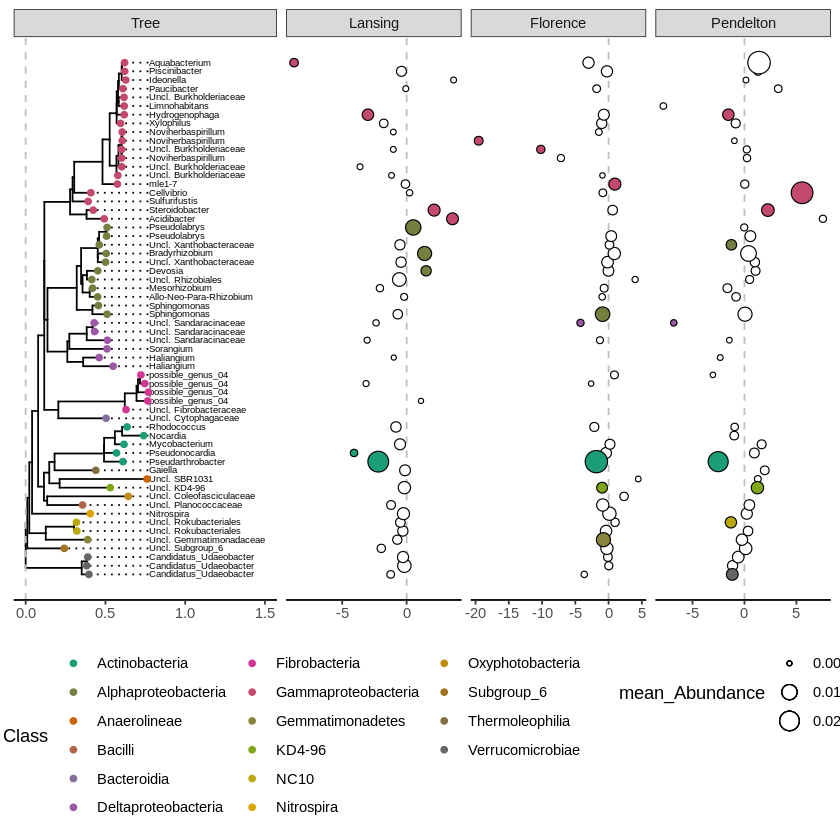

In [93]:
p  = ggtree(MyTree) %<+% df.tax
#p = p + aes(color=Phylum) 

p = p +
     geom_tiplab(aes(label = GenusLabel), align = TRUE, size = 2) +

    geom_tippoint(aes(color=Class), size=1.5)+
    scale_color_manual(values = Ccs, guide = guide_legend(ncol = 3))+

geom_vline(xintercept = 0, lty = 2, color = "Grey") +
# geom_facet(panel = "Lansing", data = df.l2fc.L.ns.1, geom= geom_point,
#                aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +
                
# geom_facet(panel = "Lansing", data = df.l2fc.L.sig.1, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), color = "LightGrey", shape = 21, alpha = 0.5) +
#                 scale_fill_identity() +
geom_facet(panel = "Lansing", data = df.l2fc.L.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
geom_facet(panel = "Lansing", data = df.l2fc.L.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21) +



# geom_facet(panel = "Florence", data = df.l2fc.F.ns.1, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +                
# geom_facet(panel = "Florence", data = df.l2fc.F.sig.1, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21,  color = "LightGrey") + 

geom_facet(panel = "Florence", data = df.l2fc.F.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
geom_facet(panel = "Florence", data = df.l2fc.F.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21) + 


# # geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.1, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, shape = 21, fill = "white", color = "LightGrey") +
# # geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.1, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21, color = "LightGrey") + 

geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21,  fill = "white", color = "Black") +                
geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs),   shape = 21) + 
    
           #ggplot2::scale_shape_manual(values = c(1,21))+
            theme_tree2(legend.position = 'bottom')+
            scale_size_continuous(guide = guide_legend(ncol = 1))+
            scale_fill_manual(limits = Ccs, values = Ccs, guide = FALSE)+


#
#xlim(c(-10, 15))+ #, 'Lansing')+
#xlim_expand(c(-10, 15), 'Florence')+
#xlim_expand(c(-10, 15), 'Pendelton')
xlim_tree(1.5)
         

p = facet_widths(p, widths = c(Tree = 1.5)) #, Lansing = 1, Florence = 1, Pendelton = 1))

p

 pdf(file = file.path(out_Dir,"BP_CS_l2fc_tree_class.pdf"), width = 7.086, height = 6.5, useDingbats = FALSE)
 p
 dev.off()

In [94]:
df.l2fc$Contrast %>% unique()

[1] "CH_CS" "CH_RT" "RT_CS" "CH_BS" "CH_BP" "RH_RS" "BH_BS" "BP_CS" "BP_BS"

# Experiment 2 Root Hyphae vs Root Slurry

In [95]:
# Get relative abundance data
mdf = readRDS(physeq_file) %>% subset_taxa(., !is.na(Phylum)) %>%
  subset_samples(., SampleType != "GV" & Experiment %in% c(1,2) & Fungus == "Gv" & 
                 SampleType %in% c("RH","RS") & Soil != "Sand") %>%
    transform_sample_counts(., function(x) x/sum(x)) %>%
    prune_taxa(topTax, .) %>% 
    psmelt()

mdf.byOTU = ddply(mdf, .(Soil, OTU, Experiment), summarize, mean_Abundance = mean(Abundance)) 

# filter and format log2fold change data
tmp = df.l2fc %>% filter(Contrast == "RH_RS" & Fungus == "Gv") %>%
    left_join(., mdf.byOTU) %>%
    select(OTU, Soil, Experiment, padj, mean_Abundance, log2FoldChange, Phylum, Order, Class, Family, Genus, Pcs, Ccs, Ocs) %>%
    filter(OTU %in% TreeTax)


df.l2fc.L = filter(tmp, Soil == "Lansing" & OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
head(df.l2fc.L)

#     #create dataframe of non-significant points
#    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.L.sig.1 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.L.ns.1 = df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.L.sig.2 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.L.ns.2= df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.F = filter(tmp, Soil == "Florence" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance ,log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.F.sig.1 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.F.ns.1 = df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.F.sig.2 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.F.ns.2= df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.P = filter(tmp, Soil == "Pendelton" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.P.sig.1 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.P.ns.1 = df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.P.sig.2 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.P.ns.2= df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 2)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
A

OTU,mean_Abundance,log2FoldChange,sig,Phylum,Order,Class,Genus,Experiment,Pcs,Ocs,Ccs
ASV5,0.002502728,-1.1718767,ns,Actinobacteria,Micrococcales,Actinobacteria,Pseudarthrobacter,2,#93752C,#79932E,#1B9E77
ASV6,0.041857276,4.1407837,ns,Proteobacteria,Cellvibrionales,Gammaproteobacteria,Cellvibrio,2,#B78415,#D35F0A,#C44A6D
ASV14,0.049075279,7.4406844,sig,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,2,#B78415,#7FA718,#9B58A5
ASV16,0.010166015,0.7049811,ns,Proteobacteria,Rhizobiales,Alphaproteobacteria,Bradyrhizobium,2,#B78415,#BF8B12,#738040
ASV17,0.009664864,5.4157433,ns,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Paucibacter,2,#B78415,#A07125,#C44A6D
ASV18,0.007379363,10.3059016,sig,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,2,#B78415,#7FA718,#9B58A5


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Removed 35 rows containing missing values (geom_point).”Warning message:
“Removed 33 rows containing missing values (geom_point).”Warning message:
“Removed 40 rows containing missing values (geom_point).”

png 
  2

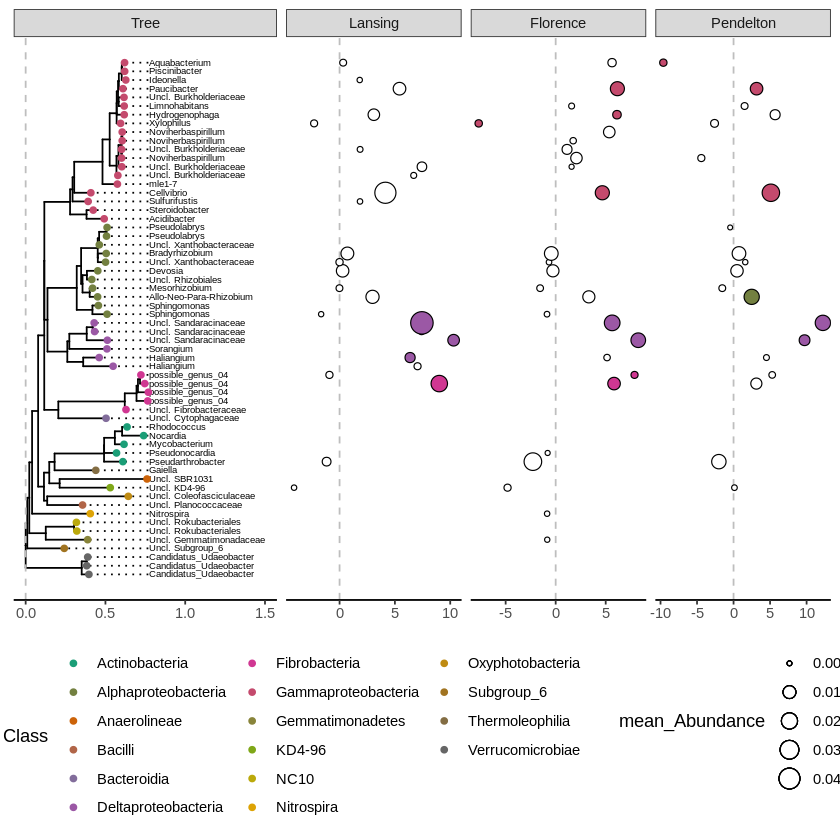

In [96]:
p  = ggtree(MyTree) %<+% df.tax
#p = p + aes(color=Phylum) 

p = p +
     geom_tiplab(aes(label = GenusLabel), align = TRUE, size = 2) +

    geom_tippoint(aes(color=Class), size=1.5)+
    scale_color_manual(values = Ccs, guide = guide_legend(ncol = 3))+

geom_vline(xintercept = 0, lty = 2, color = "Grey") +
# geom_facet(panel = "Lansing", data = df.l2fc.L.ns.1, geom= geom_point,
#                aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +
                
# geom_facet(panel = "Lansing", data = df.l2fc.L.sig.1, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), color = "LightGrey", shape = 21, alpha = 0.5) +
#                 scale_fill_identity() +
geom_facet(panel = "Lansing", data = df.l2fc.L.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
geom_facet(panel = "Lansing", data = df.l2fc.L.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21) +



# geom_facet(panel = "Florence", data = df.l2fc.F.ns.1, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +                
# geom_facet(panel = "Florence", data = df.l2fc.F.sig.1, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21,  color = "LightGrey") + 

geom_facet(panel = "Florence", data = df.l2fc.F.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
geom_facet(panel = "Florence", data = df.l2fc.F.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21) + 


# # geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.1, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, shape = 21, fill = "white", color = "LightGrey") +
# # geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.1, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21, color = "LightGrey") + 

geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21,  fill = "white", color = "Black") +                
geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs),   shape = 21) + 
    
           #ggplot2::scale_shape_manual(values = c(1,21))+
            theme_tree2(legend.position = 'bottom')+
            scale_size_continuous(guide = guide_legend(ncol = 1))+
            scale_fill_manual(limits = Ccs, values = Ccs, guide = FALSE)+


#
#xlim(c(-10, 15))+ #, 'Lansing')+
#xlim_expand(c(-10, 15), 'Florence')+
#xlim_expand(c(-10, 15), 'Pendelton')
xlim_tree(1.5)
         

p = facet_widths(p, widths = c(Tree = 1.5)) #, Lansing = 1, Florence = 1, Pendelton = 1))

p

 pdf(file = file.path(out_Dir,"RH_RS_l2fc_tree_class.pdf"), width = 7.086, height = 6.5, useDingbats = FALSE)
 p
 dev.off()

# Exp 1 CH vs RT

In [97]:
# Get relative abundance data
mdf = readRDS(physeq_file) %>% subset_taxa(., !is.na(Phylum)) %>%
  subset_samples(., SampleType != "GV" & Experiment %in% c(1,2) & Fungus == "Gv" & 
                 SampleType %in% c("CH","RT") & Soil != "Sand") %>%
    transform_sample_counts(., function(x) x/sum(x)) %>%
    prune_taxa(topTax, .) %>% 
    psmelt()

mdf.byOTU = ddply(mdf, .(Soil, OTU, Experiment), summarize, mean_Abundance = mean(Abundance)) 

# filter and format log2fold change data
tmp = df.l2fc %>% filter(Contrast == "CH_RT" & Fungus == "Gv") %>%
    left_join(., mdf.byOTU) %>%
    select(OTU, Soil, Experiment, padj, mean_Abundance, log2FoldChange, Phylum, Order, Class, Family, Genus, Pcs, Ccs, Ocs) %>%
    filter(OTU %in% TreeTax)


df.l2fc.L = filter(tmp, Soil == "Lansing" & OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
head(df.l2fc.L)

#     #create dataframe of non-significant points
#    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.L.sig.1 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.L.ns.1 = df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.L.sig.2 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.L.ns.2= df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.F = filter(tmp, Soil == "Florence" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance ,log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.F.sig.1 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.F.ns.1 = df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.F.sig.2 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.F.ns.2= df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.P = filter(tmp, Soil == "Pendelton" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.P.sig.1 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.P.ns.1 = df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.P.sig.2 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.P.ns.2= df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 2)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
A

OTU,mean_Abundance,log2FoldChange,sig,Phylum,Order,Class,Genus,Experiment,Pcs,Ocs,Ccs
ASV5,0.005908196,0.7657438,ns,Actinobacteria,Micrococcales,Actinobacteria,Pseudarthrobacter,1,#93752C,#79932E,#1B9E77
ASV6,0.022360340,-1.9548332,sig,Proteobacteria,Cellvibrionales,Gammaproteobacteria,Cellvibrio,1,#B78415,#D35F0A,#C44A6D
ASV14,0.002024861,3.4582072,ns,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,1,#B78415,#7FA718,#9B58A5
ASV16,0.005120947,-1.1629667,ns,Proteobacteria,Rhizobiales,Alphaproteobacteria,Bradyrhizobium,1,#B78415,#BF8B12,#738040
ASV17,0.000000000,NA,ns,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Paucibacter,1,#B78415,#A07125,#C44A6D
ASV18,0.013245130,1.2335346,ns,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,1,#B78415,#7FA718,#9B58A5


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Duplicated aesthetics after name standardisation: shape”Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Warning message:
“Removed 18 rows containing missing values (geom_point).”Warning message:
“Removed 17 rows containing missing values (geom_point).”Warning message:
“Removed 19 rows containing missing values (geom_point).”

png 
  2

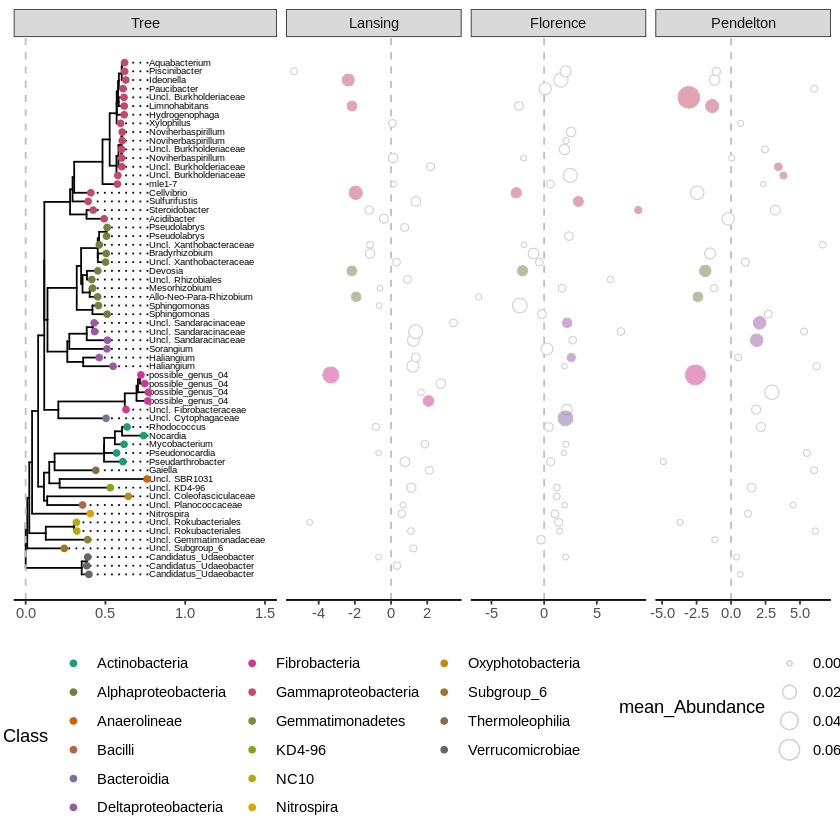

In [98]:
p  = ggtree(MyTree) %<+% df.tax
#p = p + aes(color=Phylum) 

p = p +
     geom_tiplab(aes(label = GenusLabel), align = TRUE, size = 2) +

    geom_tippoint(aes(color=Class), size=1.5)+
    scale_color_manual(values = Ccs, guide = guide_legend(ncol = 3))+

geom_vline(xintercept = 0, lty = 2, color = "Grey") +
geom_facet(panel = "Lansing", data = df.l2fc.L.ns.1, geom= geom_point,
               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +
                
geom_facet(panel = "Lansing", data = df.l2fc.L.sig.1, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), color = "LightGrey", shape = 21, alpha = 0.5) +
                scale_fill_identity() +
# geom_facet(panel = "Lansing", data = df.l2fc.L.ns.2, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
# geom_facet(panel = "Lansing", data = df.l2fc.L.sig.2, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21) +



geom_facet(panel = "Florence", data = df.l2fc.F.ns.1, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +                
geom_facet(panel = "Florence", data = df.l2fc.F.sig.1, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21,  color = "LightGrey") + 

# geom_facet(panel = "Florence", data = df.l2fc.F.ns.2, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
# geom_facet(panel = "Florence", data = df.l2fc.F.sig.2, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21) + 


geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.1, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, shape = 21, fill = "white", color = "LightGrey") +
geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.1, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21, color = "LightGrey") + 

# geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.2, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance), shape = 21,  fill = "white", color = "Black") +                
# geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.2, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs),   shape = 21) + 
    
           #ggplot2::scale_shape_manual(values = c(1,21))+
            theme_tree2(legend.position = 'bottom')+
            scale_size_continuous(guide = guide_legend(ncol = 1))+
            scale_fill_manual(limits = Ccs, values = Ccs, guide = FALSE)+


#
#xlim(c(-10, 15))+ #, 'Lansing')+
#xlim_expand(c(-10, 15), 'Florence')+
#xlim_expand(c(-10, 15), 'Pendelton')
xlim_tree(1.5)
         

p = facet_widths(p, widths = c(Tree = 1.5)) #, Lansing = 1, Florence = 1, Pendelton = 1))

p

 pdf(file = file.path(out_Dir,"CH_RT_l2fc_tree_class.pdf"), width = 7.086, height = 6.5, useDingbats = FALSE)
 p
 dev.off()

# BH vs BS

In [99]:
# Get relative abundance data
mdf = readRDS(physeq_file) %>% subset_taxa(., !is.na(Phylum)) %>%
  subset_samples(., SampleType != "GV" & Experiment %in% c(1,2) & Fungus == "Gv" & 
                 SampleType %in% c("BH","BS") & Soil != "Sand") %>%
    transform_sample_counts(., function(x) x/sum(x)) %>%
    prune_taxa(topTax, .) %>% 
    psmelt()

mdf.byOTU = ddply(mdf, .(Soil, OTU, Experiment), summarize, mean_Abundance = mean(Abundance)) 

# filter and format log2fold change data
tmp = df.l2fc %>% filter(Contrast == "BH_BS" & Fungus == "Gv") %>%
    left_join(., mdf.byOTU) %>%
    select(OTU, Soil, Experiment, padj, mean_Abundance, log2FoldChange, Phylum, Order, Class, Family, Genus, Pcs, Ccs, Ocs) %>%
    filter(OTU %in% TreeTax)


df.l2fc.L = filter(tmp, Soil == "Lansing" & OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
head(df.l2fc.L)

#     #create dataframe of non-significant points
#    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.L.sig.1 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.L.ns.1 = df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.L.sig.2 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.L.ns.2= df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.F = filter(tmp, Soil == "Florence" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance ,log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.F.sig.1 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.F.ns.1 = df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.F.sig.2 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.F.ns.2= df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.P = filter(tmp, Soil == "Pendelton" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.P.sig.1 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.P.ns.1 = df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.P.sig.2 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.P.ns.2= df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 2)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
A

OTU,mean_Abundance,log2FoldChange,sig,Phylum,Order,Class,Genus,Experiment,Pcs,Ocs,Ccs
ASV5,0.0387758498,-0.16945951,ns,Actinobacteria,Micrococcales,Actinobacteria,Pseudarthrobacter,2,#93752C,#79932E,#1B9E77
ASV6,0.0004404704,0.97246495,ns,Proteobacteria,Cellvibrionales,Gammaproteobacteria,Cellvibrio,2,#B78415,#D35F0A,#C44A6D
ASV14,0.0001325069,6.02819515,ns,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,2,#B78415,#7FA718,#9B58A5
ASV16,0.0060229166,0.06742247,ns,Proteobacteria,Rhizobiales,Alphaproteobacteria,Bradyrhizobium,2,#B78415,#BF8B12,#738040
ASV17,0.0000000000,NA,ns,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Paucibacter,2,#B78415,#A07125,#C44A6D
ASV18,0.0001562339,6.23820815,ns,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,2,#B78415,#7FA718,#9B58A5


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Removed 18 rows containing missing values (geom_point).”Warning message:
“Removed 17 rows containing missing values (geom_point).”Warning message:
“Removed 17 rows containing missing values (geom_point).”

png 
  2

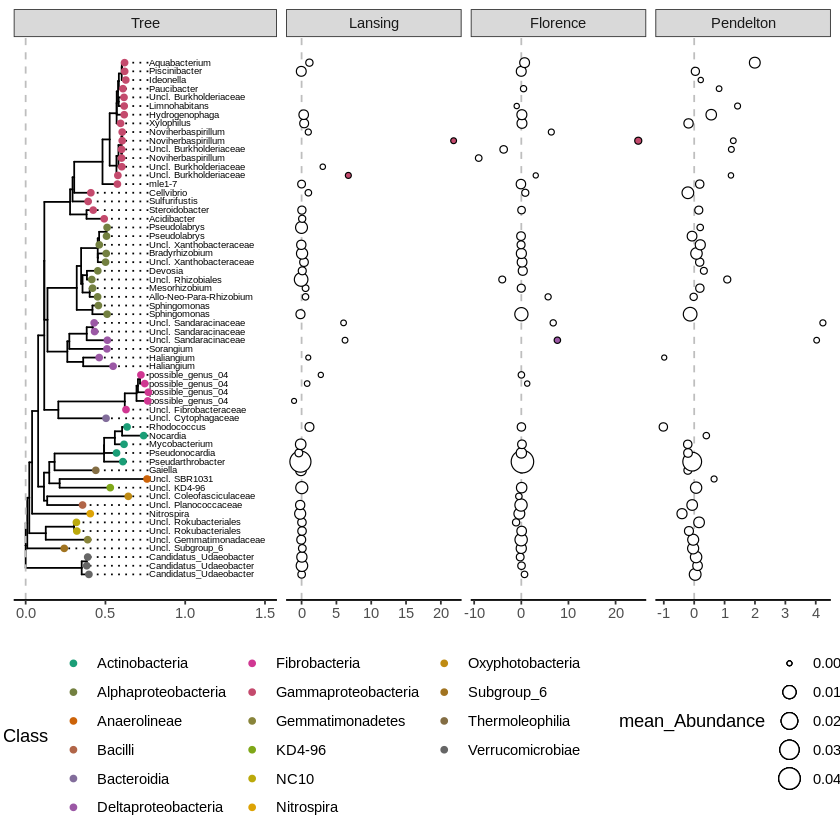

In [100]:
p  = ggtree(MyTree) %<+% df.tax
#p = p + aes(color=Phylum) 

p = p +
     geom_tiplab(aes(label = GenusLabel), align = TRUE, size = 2) +

    geom_tippoint(aes(color=Class), size=1.5)+
    scale_color_manual(values = Ccs, guide = guide_legend(ncol = 3))+


geom_vline(xintercept = 0, lty = 2, color = "Grey") +
# geom_facet(panel = "Lansing", data = df.l2fc.L.ns.1, geom= geom_point,
#                aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +
                
# geom_facet(panel = "Lansing", data = df.l2fc.L.sig.1, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), color = "LightGrey", shape = 21, alpha = 0.5) +
#                 scale_fill_identity() +
geom_facet(panel = "Lansing", data = df.l2fc.L.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
geom_facet(panel = "Lansing", data = df.l2fc.L.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21) +



# # geom_facet(panel = "Florence", data = df.l2fc.F.ns.1, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +                
# # geom_facet(panel = "Florence", data = df.l2fc.F.sig.1, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21,  color = "LightGrey") + 

geom_facet(panel = "Florence", data = df.l2fc.F.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
geom_facet(panel = "Florence", data = df.l2fc.F.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21)  +


# # geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.1, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, shape = 21, fill = "white", color = "LightGrey") +
# # geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.1, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21, color = "LightGrey") + 

geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21,  fill = "white", color = "Black") +               
# geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.2, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs),   shape = 21)  
    
           #ggplot2::scale_shape_manual(values = c(1,21))+
            theme_tree2(legend.position = 'bottom')+
            scale_size_continuous(guide = guide_legend(ncol = 1))+
            scale_fill_manual(limits = Ccs, values = Ccs, guide = FALSE)+


#
#xlim(c(-10, 15))+ #, 'Lansing')+
#xlim_expand(c(-10, 15), 'Florence')+
#xlim_expand(c(-10, 15), 'Pendelton')

         

p = facet_widths(p, widths = c(Tree = 1.5)) #, Lansing = 1, Florence = 1, Pendelton = 1))

p

 pdf(file = file.path(out_Dir,"BH_BS_l2fc_tree_class.pdf"), width = 7.086, height = 6.5, useDingbats = FALSE)
 p
 dev.off()

# Experiment 2 Gv and Ri in lansing soil comparison

### new tree to reflect Gv and Ri top taxa

In [389]:
ps.t = readRDS(physeq_file) %>% subset_taxa(., !is.na(Phylum)) %>%
    # remove non-experimental controls
    
    subset_samples(., Experiment == 2  & SampleType %in% c("CS","CH") & Soil == "Lansing") %>%

     # re-normalize after subsetting taxa
    transform_sample_counts(., function(x) x/sum(x))


                            
ps.m = ps.t %>%
    psmelt() %>%
    group_by(OTU) %>%
    summarise(mAbund = mean(Abundance)) 

                            
topTax = ps.m %>% 
    arrange(desc(mAbund)) %>%
    .[1:60,] %>%
    .$OTU %>%
    as.character()


                            


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
A

In [390]:
physeq.thresh <- prune_taxa(topTax, ps.t)

physeq.thresh

# Save tree
MyTree =  physeq.thresh %>% phy_tree

# Save names of taxa in tree
TreeTax = taxa_names(physeq.thresh)

df.tax = physeq.thresh %>% tax_table %>% as.data.frame
df.tax$OTU = df.tax %>% row.names

df.tax = mutate(df.tax, TaxLabel = paste(Family, Genus, sep = "_")) %>%
    select(OTU, TaxLabel, Phylum, Class, Order, Family, Genus)


df.tax = df.tax %>%
    mutate(GenusLabel = ifelse(!is.na(Genus), paste(Genus), 
                        ifelse(!is.na(Family), paste('Uncl. ', Family, sep = ""), 
                        ifelse(!is.na(Order), paste('Uncl. ', Order, sep = ""),
                        ifelse(!is.na(Class), paste('Uncl. ', Class, sep = ""), paste("Uncl. ", Phylum, sep = "")))))) %>%
    mutate(GenusLabel = ifelse(GenusLabel == 'Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium', 'Allo-Neo-Para-Rhizobium', GenusLabel))
head(df.tax)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 60 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 60 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 60 tips and 59 internal nodes ]

OTU,TaxLabel,Phylum,Class,Order,Family,Genus,GenusLabel
ASV37,Chthoniobacteraceae_Candidatus_Udaeobacter,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,Candidatus_Udaeobacter,Candidatus_Udaeobacter
ASV55,Chthoniobacteraceae_Candidatus_Udaeobacter,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,Candidatus_Udaeobacter,Candidatus_Udaeobacter
ASV108,Chthoniobacteraceae_Candidatus_Udaeobacter,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,Candidatus_Udaeobacter,Candidatus_Udaeobacter
ASV114,Xiphinematobacteraceae_Candidatus_Xiphinematobacter,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Xiphinematobacteraceae,Candidatus_Xiphinematobacter,Candidatus_Xiphinematobacter
ASV187,NA_NA,Acidobacteria,Subgroup_6,NA,NA,NA,Uncl. Subgroup_6
ASV58,NA_NA,Acidobacteria,Subgroup_6,NA,NA,NA,Uncl. Subgroup_6


In [391]:
# Get relative abundance data
mdf = readRDS(physeq_file) %>% subset_taxa(., !is.na(Phylum)) %>%
  subset_samples(., Experiment == 2 & 
                 SampleType %in% c("CH","CS") & Soil == "Lansing") %>%
    transform_sample_counts(., function(x) x/sum(x)) %>%
    prune_taxa(topTax, .) %>% 
    psmelt()

mdf.byOTU = ddply(mdf, .(Soil, OTU, Experiment, Fungus), summarize, mean_Abundance = mean(Abundance)) 
                            
                            head(mdf.byOTU)

# filter and format log2fold change data
tmp = df.l2fc.Exp2 %>% separate(Subset, c("Soil","Fungus"), sep = "-") %>%
    filter(Contrast == "CH_CS" & OTU %in% TreeTax & Soil == "Lansing" & Experiment == 2) %>%
    left_join(., mdf.byOTU, by = c("OTU","Soil", "Fungus", "Experiment")) %>%
    select(OTU, Soil, Fungus, Experiment, padj, mean_Abundance, 
          log2FoldChange, Phylum, Order, Class, Family, Genus) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, Soil, Fungus, mean_Abundance, log2FoldChange, sig, 
           Phylum, Order, Class, Genus, Experiment)
                            
                            



tmp = left_join(tmp, Plookup, by = c("Phylum" = "FigPhyla"))
tmp = left_join(tmp, Olookup, by = c("Order" = "FigOrder")) 
tmp = left_join(tmp, Clookup, by = c("Class" = "FigClass")) 


                            

df.l2fc.L.Gv.sig.2 = tmp %>% filter(Fungus == "Gv" & sig == "sig")
df.l2fc.L.Gv.ns.2= tmp %>% filter(Fungus == "Gv" & sig ==  "ns")

df.l2fc.L.Ri.sig.2 = tmp %>% filter(Fungus == "RI" & sig == "sig")
df.l2fc.L.Ri.ns.2= tmp %>% filter(Fungus == "RI" & sig ==  "ns")
                            
tmp %>% arrange(OTU) %>% head()

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
A

Soil,OTU,Experiment,Fungus,mean_Abundance
Lansing,ASV100,2,Gv,0.003202019
Lansing,ASV100,2,RI,0.003350886
Lansing,ASV102,2,Gv,0.000000000
Lansing,ASV102,2,RI,0.017618001
Lansing,ASV103,2,Gv,0.002556894
Lansing,ASV103,2,RI,0.003037648


Warning message:
“Column `OTU` joining factor and character vector, coercing into character vector”Warning message:
“Column `Phylum`/`FigPhyla` joining factors with different levels, coercing to character vector”Warning message:
“Column `Order`/`FigOrder` joining factors with different levels, coercing to character vector”Warning message:
“Column `Class`/`FigClass` joining factors with different levels, coercing to character vector”

OTU,Soil,Fungus,mean_Abundance,log2FoldChange,sig,Phylum,Order,Class,Genus,Experiment,Pcs,Ocs,Ccs
ASV100,Lansing,Gv,0.003202019,0.7993846,ns,Proteobacteria,Rhizobiales,Alphaproteobacteria,NA,2,#B78415,#BF8B12,#738040
ASV100,Lansing,RI,0.003350886,1.1804079,sig,Proteobacteria,Rhizobiales,Alphaproteobacteria,NA,2,#B78415,#BF8B12,#738040
ASV102,Lansing,Gv,0.000000000,NA,ns,Proteobacteria,Myxococcales,Deltaproteobacteria,Haliangium,2,#B78415,#7FA718,#9B58A5
ASV102,Lansing,RI,0.017618001,10.2383514,sig,Proteobacteria,Myxococcales,Deltaproteobacteria,Haliangium,2,#B78415,#7FA718,#9B58A5
ASV103,Lansing,Gv,0.002556894,-1.0660233,ns,Actinobacteria,Corynebacteriales,Actinobacteria,Rhodococcus,2,#93752C,#8D6B86,#1B9E77
ASV103,Lansing,RI,0.003037648,-0.7039163,ns,Actinobacteria,Corynebacteriales,Actinobacteria,Rhodococcus,2,#93752C,#8D6B86,#1B9E77


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

png 
  2

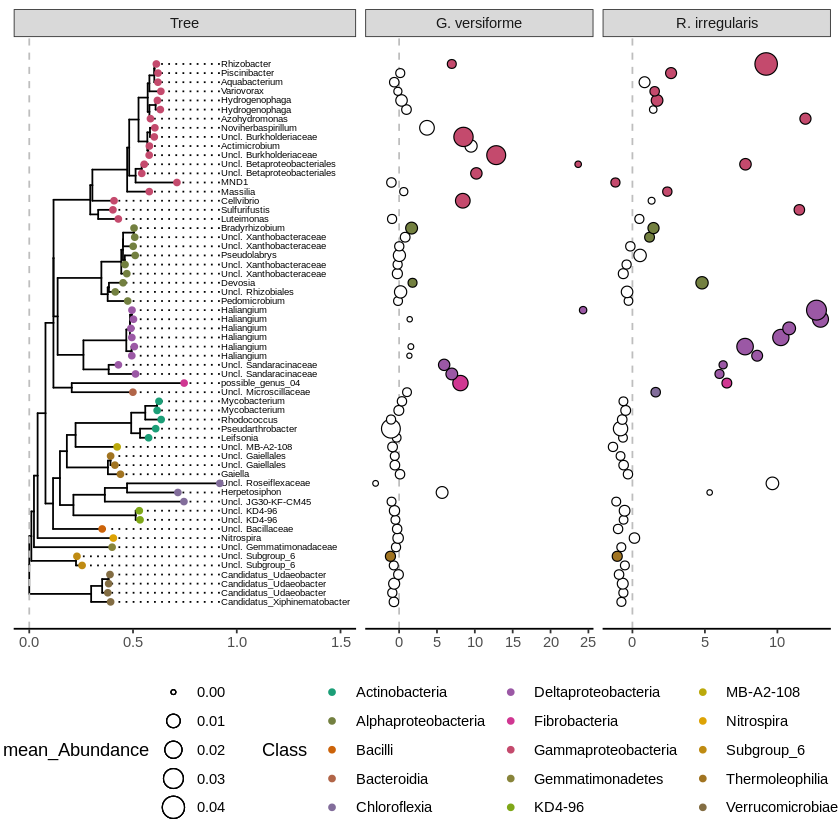

In [394]:
p  = ggtree(MyTree) %<+% df.tax
p = p +
     geom_tiplab(aes(label = GenusLabel), align = TRUE, size = 2) +

    geom_tippoint(aes(color=Class), size=1.5)+
    scale_color_manual(values = Ccs, guide = guide_legend(ncol = 3))+
    
    geom_vline(xintercept = 0, lty = 2, color = "Grey")+

    geom_facet(panel = "G. versiforme", data = df.l2fc.L.Gv.ns.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +

    geom_facet(panel = "G. versiforme", data = df.l2fc.L.Gv.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21,  color = "Black")+
    #geom_facet(panel = "G. versiforme", data = df.l2fc.L.Gv.ns.2, geom= geom_point,
     #   aes(x = log2FoldChange, size = mean_Abundance ), fill = 'red', shape = 21) 


 geom_facet(panel = "R. irregularis", data = df.l2fc.L.Ri.ns.2, geom= geom_point,
               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
geom_facet(panel = "R. irregularis", data = df.l2fc.L.Ri.sig.2, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), color = "black", shape = 21) +
  
            theme_tree2(legend.position = 'bottom')+
            scale_size_continuous(guide = guide_legend(ncol = 1))+
            scale_fill_manual(limits = Ccs, values = Ccs, guide = FALSE)+
xlim_tree(1.5)

p = facet_widths(p, widths = c(Tree = 1.5)) #, Lansing = 1, Florence = 1, Pendelton = 1))
p

 pdf(file = file.path(out_Dir,"CH_CS_l2fc_tree_class_GvandRi.pdf"), width = 7.086, height = 6.5, useDingbats = FALSE)
 p
 dev.off()

# Betaproteobacteriales over time

In [476]:
ps.t = readRDS(physeq_file) %>% subset_taxa(., !is.na(Phylum)) %>%
    # remove non-experimental controls 
    subset_samples(., Experiment == 3  & SampleType %in% c("CH") & Soil == "Lansing") %>%
     # re-normalize after subsetting taxa
    transform_sample_counts(., function(x) x/sum(x)) %>%
    subset_taxa(., Order == "Betaproteobacteriales")

ps.t <- prune_taxa(names(sort(taxa_sums(ps.t),TRUE)[1:75]), ps.t)
ps.t                            
topTax = taxa_names(ps.t)
                            
# ps.m = ps.t %>%
#     psmelt() %>%
#     group_by(OTU) %>%
#     summarise(mAbund = mean(Abundance)) 

                            
# topTax = ps.m %>% 
#     arrange(desc(mAbund)) %>%
#     .[1:75,] %>%
#     .$OTU %>%
#     as.character()

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
A

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 75 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 75 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 75 tips and 74 internal nodes ]

In [477]:


# Save tree
MyTree =  ps.t %>% phy_tree

# Save names of taxa in tree
TreeTax = taxa_names(ps.t)

df.tax = ps.t %>% tax_table %>% as.data.frame
df.tax$OTU = df.tax %>% row.names

df.tax = mutate(df.tax, TaxLabel = paste(Family, Genus, sep = "_")) %>%
    select(OTU, TaxLabel, Phylum, Class, Order, Family, Genus)


df.tax = df.tax %>%
    mutate(GenusLabel = ifelse(!is.na(Genus), paste(Genus), 
                        ifelse(!is.na(Family), paste('Uncl. ', Family, sep = ""), 
                        ifelse(!is.na(Order), paste('Uncl. ', Order, sep = ""),
                        ifelse(!is.na(Class), paste('Uncl. ', Class, sep = ""), paste("Uncl. ", Phylum, sep = "")))))) %>%
    mutate(GenusLabel = ifelse(GenusLabel == 'Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium', 'Allo-Neo-Para-Rhizobium', GenusLabel))
head(df.tax)

OTU,TaxLabel,Phylum,Class,Order,Family,Genus,GenusLabel
ASV494,NA_NA,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,NA,NA,Uncl. Betaproteobacteriales
ASV4292,NA_NA,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,NA,NA,Uncl. Betaproteobacteriales
ASV169,NA_NA,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,NA,NA,Uncl. Betaproteobacteriales
ASV5802,Burkholderiaceae_NA,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,NA,Uncl. Burkholderiaceae
ASV2435,Burkholderiaceae_Candidatus_Glomeribacter,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Candidatus_Glomeribacter,Candidatus_Glomeribacter
ASV4054,Burkholderiaceae_NA,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,NA,Uncl. Burkholderiaceae


In [478]:
mdf = psmelt(ps.t)

mdf.byOTU = ddply(mdf, .(Soil, OTU, Experiment, Fungus, DAI), summarize, mean_Abundance = mean(Abundance)) 
                            
head(mdf.byOTU)


Warning message in psmelt(ps.t):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’


Soil,OTU,Experiment,Fungus,DAI,mean_Abundance
Lansing,ASV1041,3,Gv,14,0.0008810156
Lansing,ASV1041,3,Gv,24,0.0004966782
Lansing,ASV1041,3,Gv,35,0.0001067008
Lansing,ASV1041,3,Gv,45,0.0000000000
Lansing,ASV1041,3,Gv,65,0.0000000000
Lansing,ASV1085,3,Gv,14,0.0004069198


In [479]:
readfile = file.path(work_dir, 'dfl2fc-Exp3.txt')
df.l2fc.Exp3 = read.table(readfile, header = TRUE, sep= '\t')

In [480]:
# filter and format log2fold change data
tmp = df.l2fc.Exp3 %>% separate(Subset, c("Soil","Fungus"), sep = "-") %>%
    filter(Contrast == "CH_BS" & OTU %in% topTax & Soil == "Lansing" & Experiment == 3) %>%
    left_join(., mdf.byOTU, by = c("OTU","Soil", "Fungus", "Experiment", "DAI")) %>%
    select(OTU, Soil, Fungus, Experiment, DAI, padj, mean_Abundance, 
          log2FoldChange, Phylum, Order, Class, Family, Genus) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig"),
          Selection = ifelse(log2FoldChange > 0, "Increase", "Decrease")) %>%
    select(OTU, Soil, Fungus, DAI, mean_Abundance, log2FoldChange, sig, padj, 
           Phylum, Order, Class, Genus, Experiment, Selection)
                            
                        
#subset by date for facets                           

df.14.sig = tmp %>% filter(DAI == 14 & sig == "sig")
df.14.ns = tmp %>% filter(DAI == 14 & sig ==  "ns")

df.24.sig = tmp %>% filter(DAI == 24 & sig == "sig")
df.24.ns = tmp %>% filter(DAI == 24 & sig ==  "ns")

df.35.sig = tmp %>% filter(DAI == 35 & sig == "sig")
df.35.ns = tmp %>% filter(DAI == 35 & sig ==  "ns")

df.45.sig = tmp %>% filter(DAI == 45 & sig == "sig")
df.45.ns = tmp %>% filter(DAI == 45 & sig ==  "ns")


df.65.sig = tmp %>% filter(DAI == 65 & sig == "sig")
df.65.ns = tmp %>% filter(DAI == 65 & sig ==  "ns")

                            
df.65.sig %>% arrange(OTU) %>% head()

Warning message:
“Column `OTU` joining factor and character vector, coercing into character vector”

OTU,Soil,Fungus,DAI,mean_Abundance,log2FoldChange,sig,padj,Phylum,Order,Class,Genus,Experiment,Selection
ASV1085,Lansing,Gv,65,5.487435e-03,9.289700,sig,1.750045e-02,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Rhodoferax,3,Increase
ASV121,Lansing,Gv,65,3.710427e-03,4.004046,sig,9.604670e-03,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Variovorax,3,Increase
ASV126,Lansing,Gv,65,8.490646e-05,-5.706385,sig,1.923106e-02,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,mle1-7,3,Decrease
ASV143,Lansing,Gv,65,5.465384e-03,9.868458,sig,1.087100e-02,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,NA,3,Increase
ASV148,Lansing,Gv,65,9.117965e-03,9.657938,sig,1.318209e-13,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Ideonella,3,Increase
ASV17,Lansing,Gv,65,5.521472e-03,14.013469,sig,7.369813e-05,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Paucibacter,3,Increase


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Removed 8 rows containing missing values (geom_point).”Warning message:
“Removed 9 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

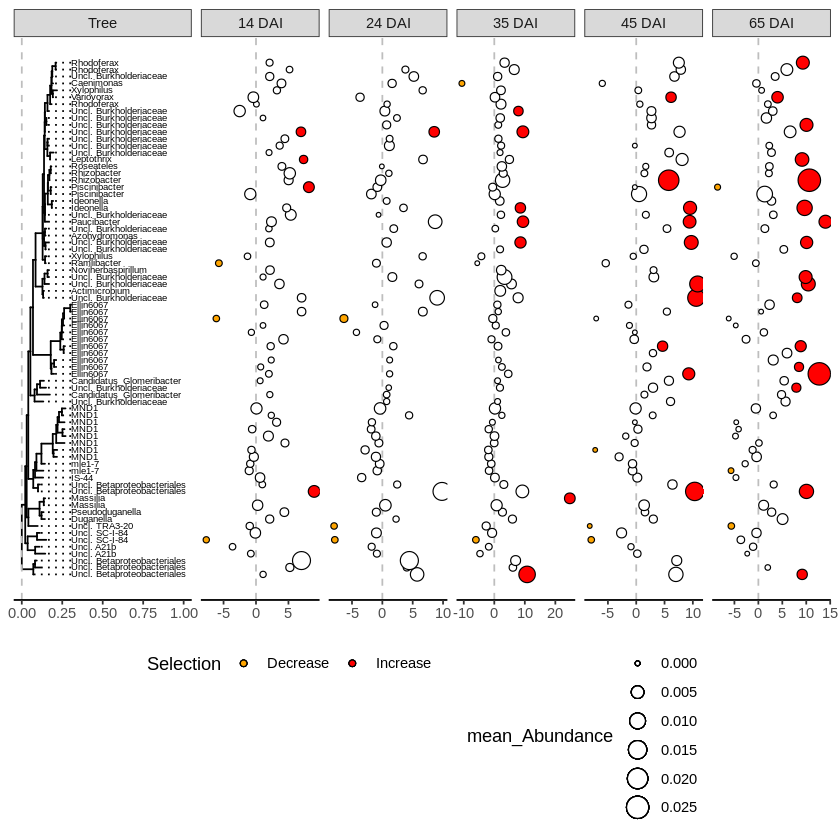

In [481]:
p  = ggtree(MyTree) %<+% df.tax
p = p +
     geom_tiplab(aes(label = GenusLabel), align = TRUE, size = 2) +

    #geom_tippoint(aes(color=Class), size=1.5)+
    #scale_color_manual(values = Ccs, guide = guide_legend(ncol = 3))+
    
    geom_vline(xintercept = 0, lty = 2, color = "Grey")+

    geom_facet(panel = "14 DAI", data = df.14.ns, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +
    geom_facet(panel = "14 DAI", data = df.14.sig, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Selection), shape = 21,  color = "Black") +
    
     geom_facet(panel = "24 DAI", data = df.24.ns, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +
    geom_facet(panel = "24 DAI", data = df.24.sig, geom= geom_point,
             aes(x = log2FoldChange, size = mean_Abundance, fill = Selection), shape = 21,  color = "Black") +
 
     geom_facet(panel = "35 DAI", data = df.35.ns, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +
    geom_facet(panel = "35 DAI", data = df.35.sig, geom= geom_point,
             aes(x = log2FoldChange, size = mean_Abundance, fill = Selection), shape = 21,  color = "Black") +

     geom_facet(panel = "45 DAI", data = df.45.ns, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +
    geom_facet(panel = "45 DAI", data = df.45.sig, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Selection), shape = 21,  color = "Black") +

     geom_facet(panel = "65 DAI", data = df.65.ns, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +
    geom_facet(panel = "65 DAI", data = df.65.sig, geom= geom_point,
              aes(x = log2FoldChange, size = mean_Abundance, fill = Selection), shape = 21,  color = "Black") +
 
            theme_tree2(legend.position = 'bottom')+
            scale_size_continuous(guide = guide_legend(ncol = 1))+
            scale_fill_manual(values = c("orange", "red"))+
            
    xlim_tree(1)

p = facet_widths(p, widths = c(Tree = 1.5)) #, Lansing = 1, Florence = 1, Pendelton = 1))
p

# Try similar for increase vs decrease over time

In [471]:
readfile = file.path(work_dir, 'dfl2fc-Exp3-time.txt')
df.l2fc.Exp3.time = read.table(readfile, header = TRUE, sep= '\t')

In [472]:
head(df.l2fc.Exp3.time)
df.l2fc.Exp3.time %>% filter(padj < 0.05) %>% .$OTU %>% unique() %>% length()

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,OTU,Subset,SampleType,Term,Contrast,Kingdom,Phylum,Class,Order,Family,Genus,Experiment
306.5828338,-0.69217257,0.2280148,-3.03564798,0.002400194,0.07209155,ASV5,Lansing-Gv,BS,TimePoint,24_14,Bacteria,Actinobacteria,Actinobacteria,Micrococcales,Micrococcaceae,Pseudarthrobacter,3
15.0782975,-2.65773367,1.4491982,-1.83393392,0.066663804,0.38138952,ASV6,Lansing-Gv,BS,TimePoint,24_14,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Cellvibrionaceae,Cellvibrio,3
2.3733196,1.63296509,3.0480366,0.53574326,0.592135998,NA,ASV8,Lansing-Gv,BS,TimePoint,24_14,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Asticcacaulis,3
0.0000000,NA,NA,NA,NA,NA,ASV13,Lansing-Gv,BS,TimePoint,24_14,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Luteimonas,3
0.9592065,-0.06318923,3.0779549,-0.02052961,0.983620888,NA,ASV14,Lansing-Gv,BS,TimePoint,24_14,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Sandaracinaceae,NA,3
16.5732171,-8.02811147,2.9650833,-2.70755002,0.006778186,0.14089255,ASV15,Lansing-Gv,BS,TimePoint,24_14,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,NA,3


[1] 251

* Need to generate global mean abundance

In [473]:
# filter and format log2fold change data
tmp = df.l2fc.Exp3.time %>% separate(Subset, c("Soil","Fungus"), sep = "-") %>%
    filter(OTU %in% topTax & SampleType == "CH") %>%
    #left_join(., mdf.byOTU, by = c("OTU","Soil", "Fungus", "Experiment")) %>%
    select(OTU, Soil, Fungus, Experiment,  padj, baseMean,
          log2FoldChange, Phylum, Order, Class, Family, Genus, Contrast) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig"),
          Selection = ifelse(log2FoldChange > 0, "Increase", "Decrease"))
                            
tmp %>% arrange(OTU) %>% head()                       
# #subset by date for facets                           


df.24.sig = tmp %>% filter(Contrast == "24_14" & sig == "sig")
df.24.ns = tmp %>% filter(Contrast == "24_14" & sig ==  "ns")

df.35.sig = tmp %>% filter(Contrast == "35_14" & sig == "sig")
df.35.ns = tmp %>% filter(Contrast == "35_14" & sig ==  "ns")

df.45.sig = tmp %>% filter(Contrast == "45_14" & sig == "sig")
df.45.ns = tmp %>% filter(Contrast == "45_14" & sig ==  "ns")


df.65.sig = tmp %>% filter(Contrast == "65_14" & sig == "sig")
df.65.ns = tmp %>% filter(Contrast == "65_14" & sig ==  "ns")

                            
df.65.sig %>% arrange(OTU) %>% head()

OTU,Soil,Fungus,Experiment,padj,baseMean,log2FoldChange,Phylum,Order,Class,Family,Genus,Contrast,sig,Selection
ASV1041,Lansing,Gv,3,0.9998765,16.124747,-3.552978,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Nitrosomonadaceae,MND1,24_14,ns,Decrease
ASV1041,Lansing,Gv,3,0.6035884,12.741060,-3.642301,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Nitrosomonadaceae,MND1,35_14,ns,Decrease
ASV1041,Lansing,Gv,3,0.5673930,9.590186,-5.391743,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Nitrosomonadaceae,MND1,45_14,ns,Decrease
ASV1041,Lansing,Gv,3,0.3368497,9.212265,-5.090344,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Nitrosomonadaceae,MND1,65_14,ns,Decrease
ASV1085,Lansing,Gv,3,0.9998765,5.667616,-1.611836,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,Rhodoferax,24_14,ns,Decrease
ASV1085,Lansing,Gv,3,0.9985620,25.762776,1.533546,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,Rhodoferax,35_14,ns,Increase


OTU,Soil,Fungus,Experiment,padj,baseMean,log2FoldChange,Phylum,Order,Class,Family,Genus,Contrast,sig,Selection
ASV143,Lansing,Gv,3,0.001124711,91.40432,12.565732,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,NA,65_14,sig,Increase
ASV148,Lansing,Gv,3,0.001124711,161.05029,5.752227,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,Ideonella,65_14,sig,Increase
ASV195,Lansing,Gv,3,0.036200013,32.78247,-7.036273,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Nitrosomonadaceae,Ellin6067,65_14,sig,Decrease
ASV2468,Lansing,Gv,3,0.024096497,31.31926,6.550706,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Nitrosomonadaceae,Ellin6067,65_14,sig,Increase
ASV249,Lansing,Gv,3,0.013939354,22.60062,-6.391430,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Nitrosomonadaceae,IS-44,65_14,sig,Decrease
ASV251,Lansing,Gv,3,0.001124711,92.42774,7.672485,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,NA,65_14,sig,Increase


In [474]:
df.24.ns %>% head()

OTU,Soil,Fungus,Experiment,padj,baseMean,log2FoldChange,Phylum,Order,Class,Family,Genus,Contrast,sig,Selection
ASV15,Lansing,Gv,3,0.9998765,79.13464,-6.5469968,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,NA,24_14,ns,Decrease
ASV17,Lansing,Gv,3,0.9998765,131.41575,2.5099236,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,Paucibacter,24_14,ns,Increase
ASV27,Lansing,Gv,3,0.9998765,57.03714,-0.7334659,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,Rhizobacter,24_14,ns,Decrease
ASV32,Lansing,Gv,3,0.9998765,92.61735,0.8727897,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,Massilia,24_14,ns,Increase
ASV40,Lansing,Gv,3,0.9998765,69.33572,-0.8403710,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,Piscinibacter,24_14,ns,Decrease
ASV57,Lansing,Gv,3,0.9998765,116.86791,2.6397078,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,NA,24_14,ns,Increase


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

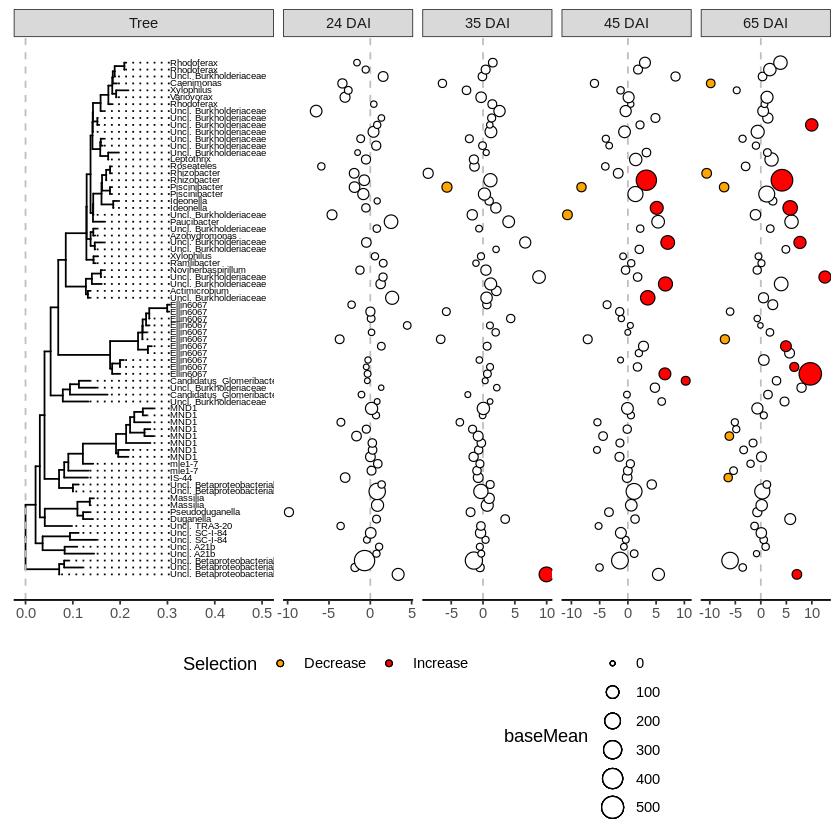

In [475]:
p  = ggtree(MyTree) %<+% df.tax
p = p +
     geom_tiplab(aes(label = GenusLabel), align = TRUE, size = 2) +

#     #geom_tippoint(aes(color=Class), size=1.5)+
#     #scale_color_manual(values = Ccs, guide = guide_legend(ncol = 3))+
    
     geom_vline(xintercept = 0, lty = 2, color = "Grey")+

    
    
     geom_facet(panel = "24 DAI", data = df.24.ns, geom= geom_point,
              aes(x = log2FoldChange, size = baseMean), shape = 21, fill = "white", color = "Black") +
#     geom_facet(panel = "24 DAI", data = df.24.sig, geom= geom_point,
#              aes(x = log2FoldChange, size = baseMean, fill = Selection), shape = 21,  color = "Black") +
 
     geom_facet(panel = "35 DAI", data = df.35.ns, geom= geom_point,
              aes(x = log2FoldChange, size = baseMean), shape = 21, fill = "white", color = "Black") +
    geom_facet(panel = "35 DAI", data = df.35.sig, geom= geom_point,
             aes(x = log2FoldChange, size = baseMean, fill = Selection), shape = 21,  color = "Black") +

     geom_facet(panel = "45 DAI", data = df.45.ns, geom= geom_point,
              aes(x = log2FoldChange, size = baseMean), shape = 21, fill = "white", color = "Black") +
    geom_facet(panel = "45 DAI", data = df.45.sig, geom= geom_point,
              aes(x = log2FoldChange, size = baseMean, fill = Selection), shape = 21,  color = "Black") +

     geom_facet(panel = "65 DAI", data = df.65.ns, geom= geom_point,
              aes(x = log2FoldChange, size = baseMean), shape = 21, fill = "white", color = "Black") +
    geom_facet(panel = "65 DAI", data = df.65.sig, geom= geom_point,
              aes(x = log2FoldChange, size = baseMean, fill = Selection), shape = 21,  color = "Black") +
 
            theme_tree2(legend.position = 'bottom')+
            scale_size_continuous(guide = guide_legend(ncol = 1))+
            scale_fill_manual(values = c("orange", "red"))+
            
    xlim_tree(0.5)

p = facet_widths(p, widths = c(Tree = 2)) #, Lansing = 1, Florence = 1, Pendelton = 1))
p

# Sandbox

# Experiment 2 R. irregularis BH vs BS

In [111]:
# Get relative abundance data
mdf = readRDS(physeq_file) %>% subset_taxa(., !is.na(Phylum)) %>%
  subset_samples(., SampleType != "Gv" & Experiment %in% c(1,2) & Fungus == "RI" & 
                 SampleType %in% c("BH","BS") & Soil != "Sand") %>%
    transform_sample_counts(., function(x) x/sum(x)) %>%
    prune_taxa(topTax, .) %>% 
    psmelt()

mdf.byOTU = ddply(mdf, .(Soil, OTU, Experiment), summarize, mean_Abundance = mean(Abundance)) 

# filter and format log2fold change data
tmp = df.l2fc %>% filter(Contrast == "BH_BS" & Fungus == "RI") %>%
    left_join(., mdf.byOTU) %>%
    select(OTU, Soil, Experiment, padj, mean_Abundance, log2FoldChange, Phylum, Order, Class, Family, Genus, Pcs, Ccs, Ocs) %>%
    filter(OTU %in% TreeTax)


df.l2fc.L = filter(tmp, Soil == "Lansing" & OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
head(df.l2fc.L)

#     #create dataframe of non-significant points
#    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.L.sig.1 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.L.ns.1 = df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.L.sig.2 = df.l2fc.L %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.L.ns.2= df.l2fc.L %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.F = filter(tmp, Soil == "Florence" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance ,log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.F.sig.1 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.F.ns.1 = df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.F.sig.2 = df.l2fc.F %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.F.ns.2= df.l2fc.F %>% filter(sig ==  "ns" & Experiment == 2)

df.l2fc.P = filter(tmp, Soil == "Pendelton" &  OTU %in% TreeTax) %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", "sig")) %>%
    select(OTU, mean_Abundance, log2FoldChange, sig, Phylum, Order, Class, Genus, Experiment, Pcs, Ocs, Ccs)
    
    #create dataframe of non-significant points
    #df.sub = df %>% filter(sig == "ns" | is.na(sig))
df.l2fc.P.sig.1 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 1)
df.l2fc.P.ns.1 = df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 1)
df.l2fc.P.sig.2 = df.l2fc.P %>% filter(sig == "sig" & Experiment == 2)
df.l2fc.P.ns.2= df.l2fc.P %>% filter(sig ==  "ns" & Experiment == 2)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
A

OTU,mean_Abundance,log2FoldChange,sig,Phylum,Order,Class,Genus,Experiment,Pcs,Ocs,Ccs
ASV5,1.870052e-02,-0.3032531,ns,Actinobacteria,Micrococcales,Actinobacteria,Pseudarthrobacter,2,#93752C,#79932E,#1B9E77
ASV6,1.403065e-04,0.4850203,ns,Proteobacteria,Cellvibrionales,Gammaproteobacteria,Cellvibrio,2,#B78415,#D35F0A,#C44A6D
ASV14,1.491291e-05,-0.8693191,ns,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,2,#B78415,#7FA718,#9B58A5
ASV16,6.007337e-03,0.0505759,ns,Proteobacteria,Rhizobiales,Alphaproteobacteria,Bradyrhizobium,2,#B78415,#BF8B12,#738040
ASV17,0.000000e+00,NA,ns,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Paucibacter,2,#B78415,#A07125,#C44A6D
ASV18,0.000000e+00,NA,ns,Proteobacteria,Myxococcales,Deltaproteobacteria,NA,2,#B78415,#7FA718,#9B58A5


In [112]:
# p  = ggtree(MyTree) %<+% df.tax
# #p = p + aes(color=Phylum) 

# p = p +
#      geom_tiplab(aes(label = GenusLabel), align = TRUE, size = 2) +

#     geom_tippoint(aes(color=Class), size=1.5)+
#     scale_color_manual(values = Ccs, guide = guide_legend(ncol = 3))+


# geom_vline(xintercept = 0, lty = 2, color = "Grey") +
# # geom_facet(panel = "Lansing", data = df.l2fc.L.ns.1, geom= geom_point,
# #                aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +
                
# # geom_facet(panel = "Lansing", data = df.l2fc.L.sig.1, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), color = "LightGrey", shape = 21, alpha = 0.5) +
# #                 scale_fill_identity() +
# geom_facet(panel = "Lansing", data = df.l2fc.L.ns.2, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
# geom_facet(panel = "Lansing", data = df.l2fc.L.sig.2, geom= geom_point,
#               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21) +



# # # geom_facet(panel = "Florence", data = df.l2fc.F.ns.1, geom= geom_point,
# # #               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "LightGrey") +                
# # # geom_facet(panel = "Florence", data = df.l2fc.F.sig.1, geom= geom_point,
# # #               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21,  color = "LightGrey") + 

# # geom_facet(panel = "Florence", data = df.l2fc.F.ns.2, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, fill = "white", color = "Black") +                
# # geom_facet(panel = "Florence", data = df.l2fc.F.sig.2, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), shape = 21)  +


# # # geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.1, geom= geom_point,
# # #               aes(x = log2FoldChange, size = mean_Abundance), shape = 21, shape = 21, fill = "white", color = "LightGrey") +
# # # geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.1, geom= geom_point,
# # #               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs), alpha = 0.5, shape = 21, color = "LightGrey") + 

# # geom_facet(panel = "Pendelton", data = df.l2fc.P.ns.2, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance), shape = 21,  fill = "white", color = "Black") +               
# # geom_facet(panel = "Pendelton", data = df.l2fc.P.sig.2, geom= geom_point,
# #               aes(x = log2FoldChange, size = mean_Abundance, fill = Ccs),   shape = 21)  
    
#            #ggplot2::scale_shape_manual(values = c(1,21))+
#             theme_tree2(legend.position = 'bottom')+
#             scale_size_continuous(guide = guide_legend(ncol = 1))+
#             scale_fill_manual(limits = Ccs, values = Ccs, guide = FALSE)+


# #
# #xlim(c(-10, 15))+ #, 'Lansing')+
# #xlim_expand(c(-10, 15), 'Florence')+
# #xlim_expand(c(-10, 15), 'Pendelton')
# xlim_tree(1.5)
         

# p = facet_widths(p, widths = c(Tree = 1.5)) #, Lansing = 1, Florence = 1, Pendelton = 1))

# p

#  pdf(file = file.path(out_Dir,"BH_BS_Ri_l2fc_tree_class.pdf"), width = 7.086, height = 6.5, useDingbats = FALSE)
#  p
#  dev.off()

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Warning message:
“Duplicated aesthetics after name standardisation: size”

ERROR: Error in `[[<-.data.frame`(`*tmp*`, ".panel", value = structure(2L, .Label = c("Tree", : replacement has 1 row, data has 0
